### Converting audio into spectograms views

In [1]:
# Math + plot
import matplotlib.pyplot as plt
import numpy as np

# Audio handling
import librosa.display
import librosa

In [2]:
path = "../data/drums-demo.wav"

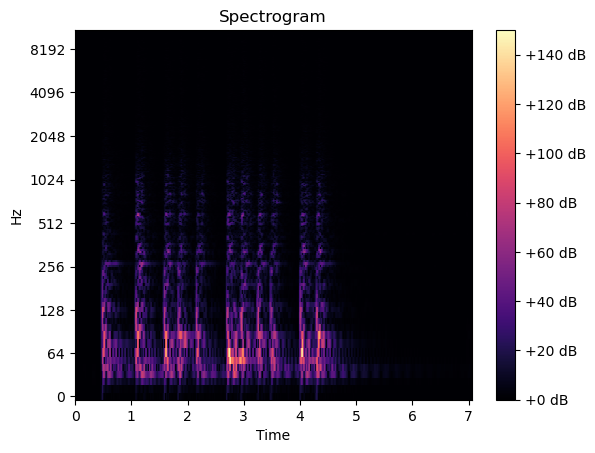

In [3]:
# Compute spectrogram using librosa
y, sr = librosa.load(path)
D = librosa.stft(y, n_fft=2048, hop_length=256)
S = np.abs(D)

# Display
fig, ax = plt.subplots()
img = librosa.display.specshow(
    S, sr=sr, hop_length=256, x_axis='time', y_axis='log', ax=ax, cmap='magma'
)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

In [4]:
def generate_clear_spectogram(audio_path: str):
    y, sr = librosa.load(audio_path)
    D = librosa.stft(y, n_fft=2048, hop_length=256)
    S = np.abs(D)

    fig, ax = plt.subplots()
    img = librosa.display.specshow(
        S, sr=sr, hop_length=256, y_axis='log', ax=ax, cmap='magma'
    )
    ax.set_ylabel("")
    ax.set_yticklabels("")
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    fig.set_facecolor("#000000")
    plt.tight_layout()
    plt.show()

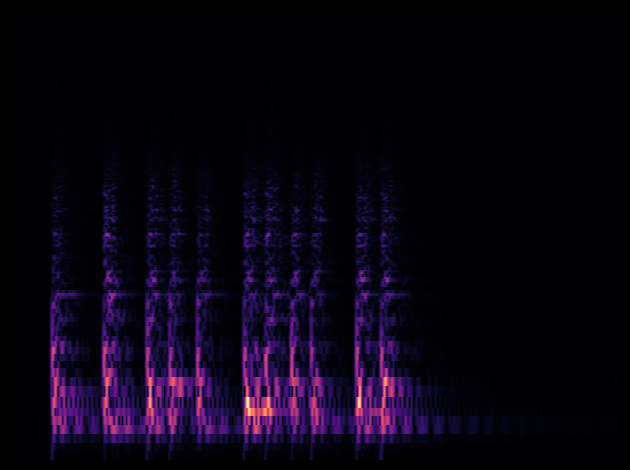

In [ ]:
path = "../data/drums-demo.wav"
generate_clear_spectogram(path)

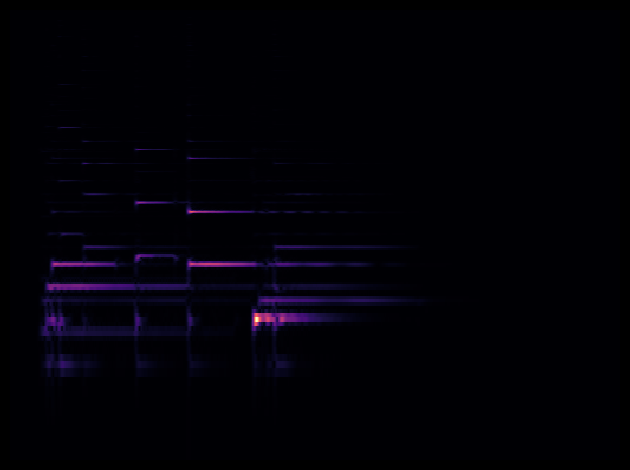

In [6]:
path = "../data/guitar-demo.wav"
generate_clear_spectogram(path)

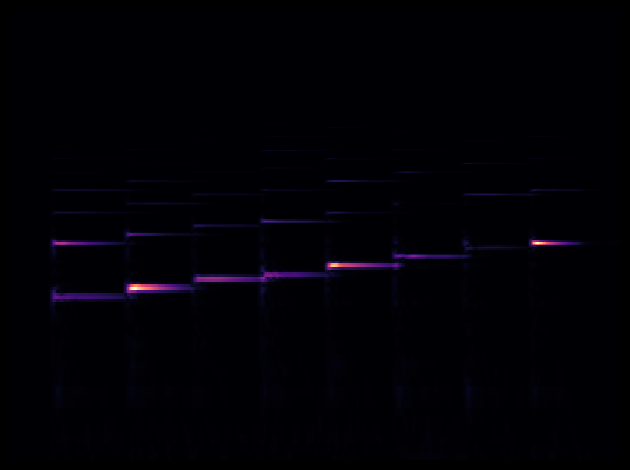

In [9]:
path = "../data/piano-demo.wav"
generate_clear_spectogram(path)

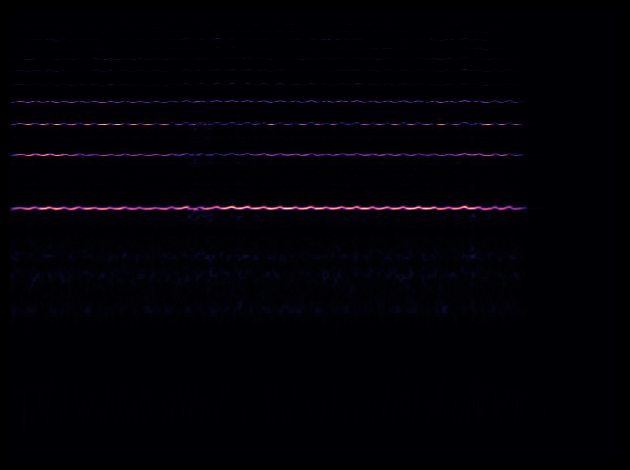

In [8]:
path = "../data/violin-demo.wav"
generate_clear_spectogram(path)

In [33]:
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.transforms as T

def plot_mel_spectrogram(audio_file):
    # Load the audio file
    waveform, sample_rate = torchaudio.load(audio_file)

    # Define MelSpectrogram transform
    mel_spec_transform = T.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=2048,            # Length of FFT window
        hop_length=2048,       # Hop length between windows
        n_mels=128,            # Number of Mel bands
        mel_scale="htk"       # Mel scale (can be 'slaney' or 'htk')
    )

    # Apply the MelSpectrogram transform to the waveform
    mel_spectrogram = mel_spec_transform(waveform)

    mel_spectrogram_db = torch.log10(mel_spectrogram + 1e-6) * 10  # Scale to dB (10 * log10)

    # Convert the tensor to a numpy array for plotting
    mel_spectrogram = mel_spectrogram_db.squeeze().detach().numpy()

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.imshow(mel_spectrogram, cmap='viridis', origin='lower', aspect='auto', extent=[0, mel_spectrogram.shape[-1], 0, mel_spectrogram.shape[0]])
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel Spectrogram")
    plt.xlabel("Frames")
    plt.ylabel("Mel bins")
    plt.show()

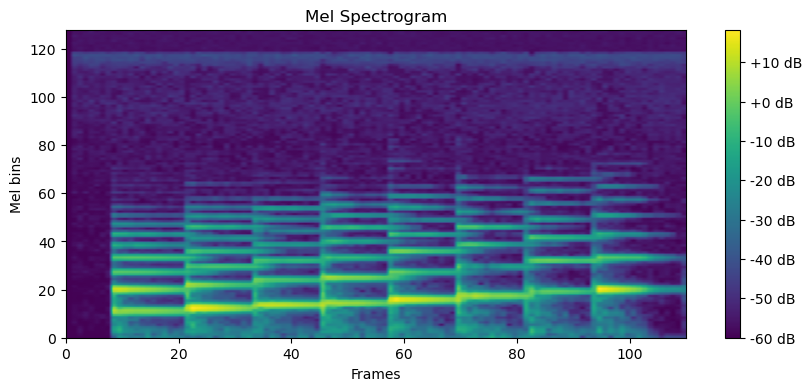

In [34]:
path = "../data/piano-demo.wav"
plot_mel_spectrogram(path)

In [21]:
mel_transform = T.MelSpectrogram(
    sample_rate=44100, 
    n_fft=2048, 
    hop_length=512, 
    n_mels=128
)

In [22]:
wv, sr = torchaudio.load(path)

In [27]:
mel_spectrogram = mel_transform(wv)

In [29]:
import torch

In [47]:
mel_spectrogram_db = torch.log10(mel_spectrogram + 1e-8) * 10  # Scale to dB (10 * log10)

In [49]:
mel_spectrogram_db

tensor([[[-80.0000, -79.7374, -79.2851,  ..., -44.5127, -43.0163, -43.9679],
         [-80.0000, -79.4849, -76.9398,  ..., -53.0265, -51.3672, -50.5260],
         [-80.0000, -79.2315, -72.5788,  ..., -66.7422, -65.7904, -54.2420],
         ...,
         [-80.0000, -73.8206, -62.3796,  ..., -55.5152, -56.7521, -58.9134],
         [-80.0000, -72.7316, -61.7784,  ..., -58.7371, -56.9557, -58.1797],
         [-80.0000, -69.8058, -59.4657,  ..., -58.8458, -57.4954, -59.0126]]])

In [48]:
mel_spectrogram_db.min()

tensor(-80.)

In [35]:
import librosa

In [43]:
mel_spec_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

In [44]:
mel_spec_db

array([[[-80.      , -80.      , -80.      , ..., -62.98138 ,
         -61.48461 , -62.436428],
        [-80.      , -80.      , -80.      , ..., -71.50272 ,
         -69.84059 , -68.99838 ],
        [-80.      , -80.      , -80.      , ..., -80.      ,
         -80.      , -72.72103 ],
        ...,
        [-80.      , -80.      , -80.      , ..., -73.99815 ,
         -75.24017 , -77.414825],
        [-80.      , -80.      , -80.      , ..., -77.23718 ,
         -75.44472 , -76.67578 ],
        [-80.      , -80.      , -77.97175 , ..., -77.346664,
         -75.98732 , -77.51483 ]]], dtype=float32)